# Final Project: Analyzing Breast Cancer Causation

Reecha Sharma & Shreya Thotapally

In our project, we will go over the possible factors that may increase chances of breast cancer recurrence, and the relations between cancer severity. We are using data from the datahub.io: https://datahub.io/machine-learning/breast-cancer#resource-breast-cancer. The data was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. We thank M. Zwitter and M. Soklic for providing the data! 

 ## Data collection/curation

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from statsmodels.formula.api import ols
import seaborn as sns

#read data into pandas dataframe.
data = pd.read_csv("breast-cancer_csv.csv", header=0, sep = ',') 
data.head()
#Let's print the head of the data to get an idea of it 

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


## Data management/representation

In the description of the data set, they mention that there are about 8 missing values denoted with "?" in the
node-caps column. As our main focus is to find the possible factors that may contribute to breast cancer occurance
and recurrence, we will be taking out the breast column and the breast-quad column and other columns we will not be focusing on.

In [91]:
# Let's delete the columns not needed to clean the data up.
data = data.drop('breast', axis=1)
data = data.drop('breast-quad', axis=1)
data = data.drop('inv-nodes', axis=1)
data = data.drop('node-caps', axis=1)
data.head()

,age,menopause,tumor-size,deg-malig,irradiat,Class
0,40-49,premeno,15-19,3,no,recurrence-events
1,50-59,ge40,15-19,1,no,no-recurrence-events
2,50-59,ge40,35-39,2,no,recurrence-events
3,40-49,premeno,35-39,3,yes,no-recurrence-events
4,40-49,premeno,30-34,2,no,recurrence-events


In [92]:
data.describe

<bound method NDFrame.describe of        age menopause tumor-size  deg-malig irradiat                 Class
0    40-49   premeno      15-19          3       no     recurrence-events
1    50-59      ge40      15-19          1       no  no-recurrence-events
2    50-59      ge40      35-39          2       no     recurrence-events
3    40-49   premeno      35-39          3      yes  no-recurrence-events
4    40-49   premeno      30-34          2       no     recurrence-events
..     ...       ...        ...        ...      ...                   ...
281  50-59      ge40      30-34          2       no  no-recurrence-events
282  50-59   premeno      25-29          2      yes  no-recurrence-events
283  30-39   premeno      30-34          2       no  no-recurrence-events
284  50-59   premeno      15-19          2       no  no-recurrence-events
285  50-59      ge40      40-44          3       no  no-recurrence-events

[286 rows x 6 columns]>

## Exploratory data analysis

Let's take a look at all the columns we are left with and their relation to breast cancer. First, we will start with looking at the relationship between the age of the patient and the histological grade of the tumor. This will tell us if there is any influence of age on the degree of malignancy with grade 1 being the least agressive and grade 4 being the most agressive. 

Text(0.5, 0, 'Age of Patient')

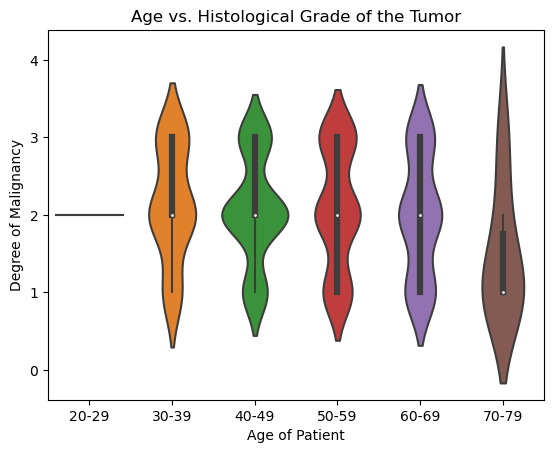

In [114]:
# Create a violin plot using seaborn. By creating a violin plot we are able to see the frequencies of the grade 
# very clearly. 
ax = sns.violinplot(x="age", y="deg-malig", data=data, order=["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
ax.set_title('Age vs. Histological Grade of the Tumor')
ax.set_ylabel("Degree of Malignancy")
ax.set_xlabel("Age of Patient")

From this graph, we are able to tell a couple of things. Starting with the age range 20-29, it seems that we have only one piece of data from this age group, and this individual was found to have a grade 2 tumor. Of course, we are unable to assume that breast cancer doesn't affect this group as our data is not representative. The next observation is about the age group 70-79. This age group has the largest range, but looking at the median we can see that most values fall in the lower range, mostly around grade 1 while the other age ranges stay at a median of 2. The 50-59 and 60-69 age group seems to have a somewhat similar distribution with their median, first and third IQR. The 30-39 and 40-49 age groups also seem to be somewhat similar inrespect to their median, first and third IQR. But, the 40-49 age group seems to be the most populated at the median than all other age groups. Overall, it seems that when patients come in, their tumors are mostly found to be in stage 2. There doesn't seem to be any clear relation to age, except for the fact that most of our data lies within the ages 30-79, and maybe that tumors seems to be more aggressive if the individual is younger.

From our previous drawings, now we wonder if there is a relationship between having menopause/ the age of going through menopause and the agressiveness of the tumor. Let's plot this. The menopause column provides us with three different values. premeno: meaning the individual has not gone through menopause, lt40: meaning the individual went through menopause before age 40, ge40: meaning the individual went through menopause at or after the age 40.

Text(0.5, 0, 'Menopause Status')

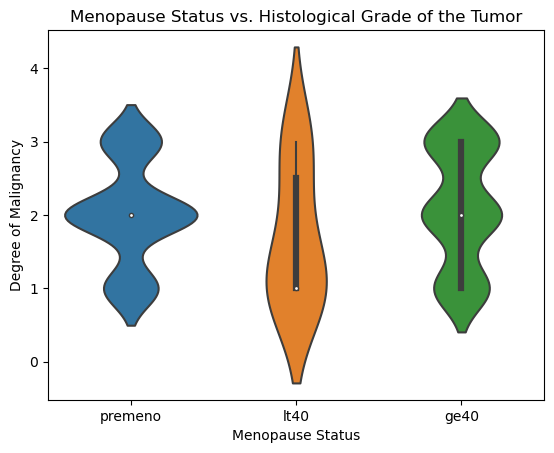

In [126]:
ax = sns.violinplot(x="menopause", y="deg-malig", data=data, order=["premeno", "lt40", "ge40"])
ax.set_title('Menopause Status vs. Histological Grade of the Tumor')
ax.set_ylabel("Degree of Malignancy")
ax.set_xlabel("Menopause Status")

Looking at this graph, we can see that those who have not gone through menopause have a strong likelihood of finding their tumor at stage 2. We can also see that those who went through menopause before the age of 40 have a lower median of grade 4, and a larger range of degrees. Those who went through menopause at or after the age of 40 seem to have an even chance at detecting their tumor at grades 1, 2, and 3. We are able to make the assumption that menopause may have an affect on the degree of the patient's tumor if the patient has gone through menopause befor the age of 40.

To furthur explore this assumption, lets add age to the graph:

Text(0.5, 0, 'Age of Patient')

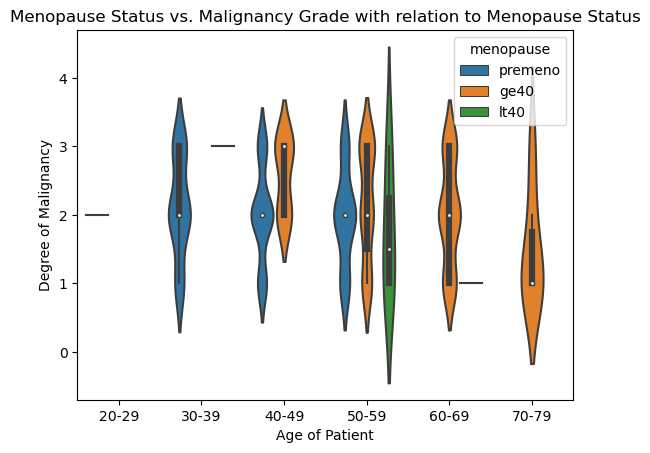

In [134]:
ax = sns.violinplot(x="age", y="deg-malig", data=data, hue='menopause', order=["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
ax.set_title('Menopause Status vs. Malignancy Grade with relation to Menopause Status')
ax.set_ylabel("Degree of Malignancy")
ax.set_xlabel("Age of Patient")

Looking at this graph, we are able to see that there appears to be more women who have gone through their menopause at or after the age of 40 in the graph than women who have gone through their menopause before the age of 40. Here it might be easy to assume that breast cancer may be more prevelant in women who have gone through menopause at or after the age of 40, but according to https://www.mayoclinic.org/diseases-conditions/menopause/symptoms-causes/syc-20353397, women usually go through menopause in their 40s or 50s or in our case: ge40. So the measure of age 40 may not be helpful in this case.

Next, let's analyze the degree of malignancy and class relationship for each age group. 

[[<matplotlib.axis.YTick at 0x7f504acada30>,

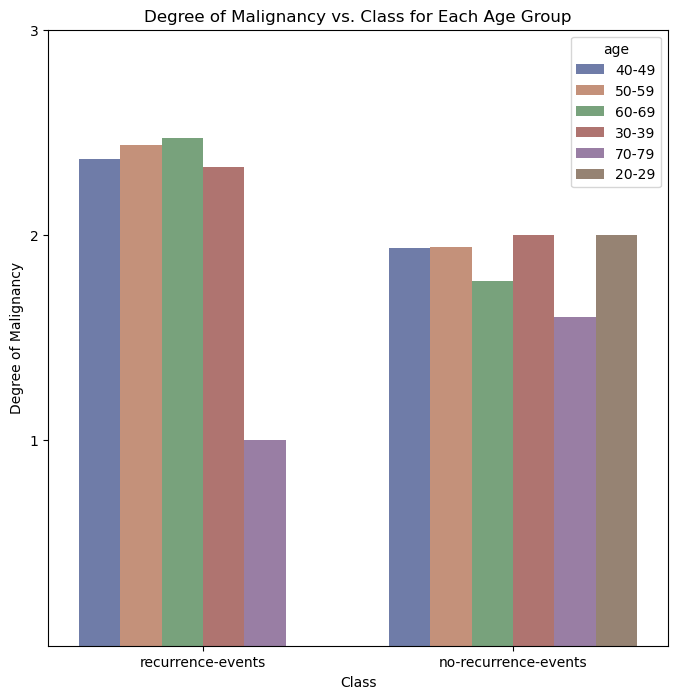

In [152]:
import seaborn as sns
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Degree of Malignancy vs. Class for Each Age Group')
sns.barplot(
    data=data,
    x="Class", y="deg-malig", hue="age",
    ax = ax, ci=None, palette="dark", alpha=.6)
ax.set(xlabel='Class', ylabel='Degree of Malignancy')
ax.set_xticklabels(['recurrence-events', 'no-recurrence-events'])
ax.set(yticks = [1,2,3])

From the above bar graph, we can conclude that the tumors with higher recorded degrees of malignancy had higher rates of recurrence events occuring. We can also see that almost all of the instances of no-recurrence-events have a degree of malignancy centered around 2. Although these are findings and observations that can be concluded from this graph, we are, however, unable to determine whether the patient's age or degree of malignancy is directly related to the chance of a reccurence-event. 

## Hypothesis testing and machine learning

Now we want to explore whether radiation exposure has a correlation with the degree of malignancy. We hypothesize that there will be a positive correlation between these two factors: If the patient has had radiation history, the degree malignancy of the tumor will me higher.

Text(0.5, 0, 'Radiation History')

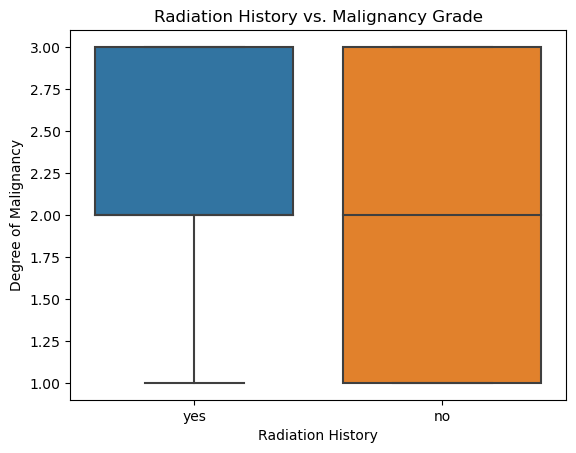

In [139]:
ax = sns.boxplot(x="irradiat", y="deg-malig", data=data, order=["yes", "no"])
ax.set_title('Radiation History vs. Malignancy Grade')
ax.set_ylabel("Degree of Malignancy")
ax.set_xlabel("Radiation History")

Based on this graph, we can see that there seems to be a correlation between degree malignancy and the patient's radiation history. If the patient has had radiation through x-rays before, the degree of malignancy of their tumors may tend to be higher (their tumors may be more agressive).

In [140]:
# lm = linear_model.LinearRegression()
# lmf = lm.fit(data['age'], data['Class'])
# We tried to create a regression, but we were unable to due to the structure of the data.

## Communication of insights attained

Through our research of this data, we have found a couple new findings. We were able to conclude that patients with higher degrees of malignancy were more likely to have a reported history of radiation compared to lower degreed tumors. Through the Degree of Malignancy vs. Class for Each Age Group graph, we learned that a majority of instances where recurrence events ocurred were in patients with higher degrees of tumor malignancy, regardless of their age group. We were only able to arrive at minimal conclusive insights through our research and graph representation. This is because a majority of the factors of the women documented have portrayed a lack of remarkable explicit relationships between any two factors. For instance, the age of the individual did not reveal a correlation to the chances of reccurence events, or a relationship with the stage of menopause effecting the degree of malignancy. The data was scattered, but it was scattered evenly across all elements of the study, resulting in a lack of trends or clusters present. Ultimately, our given data set did not provide much insight on the relationship of certain aspects of an individual with their cancer. 